Reference: 

- https://github.com/robbievanleeuwen/concrete-properties
- https://numpy.org/

Import first the libraries 

```python
!pip install concreteproperties
```

In [1]:
!pip install concreteproperties

Defaulting to user installation because normal site-packages is not writeable


## Import the necessary Modules
```python
import numpy as np
from sectionproperties.pre.library import concrete_rectangular_section

from concreteproperties import (
    Concrete,
    ConcreteLinear,
    ConcreteSection,
    RectangularStressBlock,
    SteelBar,
    SteelElasticPlastic,
)
from concreteproperties.results import MomentInteractionResults
```

In [1]:
import numpy as np
from sectionproperties.pre.library import concrete_rectangular_section

from concreteproperties import (
    Concrete,
    ConcreteLinear,
    ConcreteSection,
    RectangularStressBlock,
    SteelBar,
    SteelElasticPlastic,
)
from concreteproperties.results import MomentInteractionResults

## Materical Assignment
reference : https://concrete-properties.readthedocs.io/en/stable/user_guide/materials.html
```python
concrete = Concrete(
    name="32 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30.1e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=32,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)
```

In [7]:
# fc = 20.68
# ec = 4700*math.sqrt(fc)
concrete = Concrete(
    name="20.68 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30.1e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=20.68,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = {
    "Grade 60" : {
        "label_strength": "450 MPa Steel",
        "value" : 450
    }
}

selected = "Grade 60"

steel = SteelBar(
    name=steel[selected]["label_strength"],
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=steel[selected]["value"],
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

# steel = SteelBar(
#     name="414 MPa Steel",
#     density=7.85e-6,
#     stress_strain_profile=SteelElasticPlastic(
#         yield_strength=414,
#         elastic_modulus=200e3,
#         fracture_strain=0.05,
#     ),
#     colour="grey",
# )

## Create Geometry and Concrete Section
reference: 
- https://concrete-properties.readthedocs.io/en/stable/user_guide/geometry.html
- https://concrete-properties.readthedocs.io/en/stable/user_guide/analysis.html
```python
geom = concrete_rectangular_section(
    b=400,
    d=600,
    dia_top=25,
    area_top=310,
    n_top=3,
    c_top=30,
    dia_bot=24,
    area_bot=450,
    n_bot=3,
    c_bot=30,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()
```

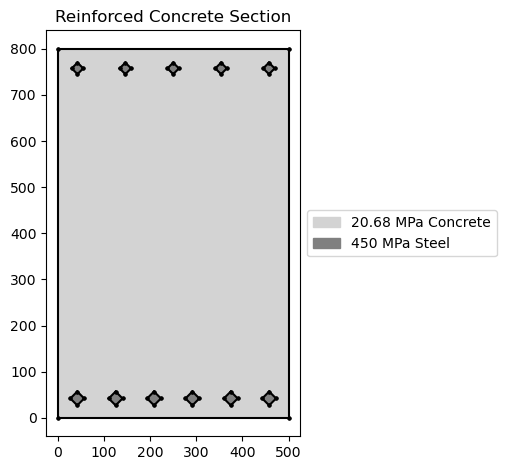

<Axes: title={'center': 'Reinforced Concrete Section'}>

In [9]:
geom = concrete_rectangular_section(
    b=500,
    d=800,
    dia_top=25,
    area_top=310,
    n_top=5,
    c_top=30,
    dia_bot=24,
    area_bot=450,
    n_bot=6,
    c_bot=30,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

```python
mi_res = conc_sec.moment_interaction_diagram(progress_bar=False)
mi_res.plot_diagram()
```

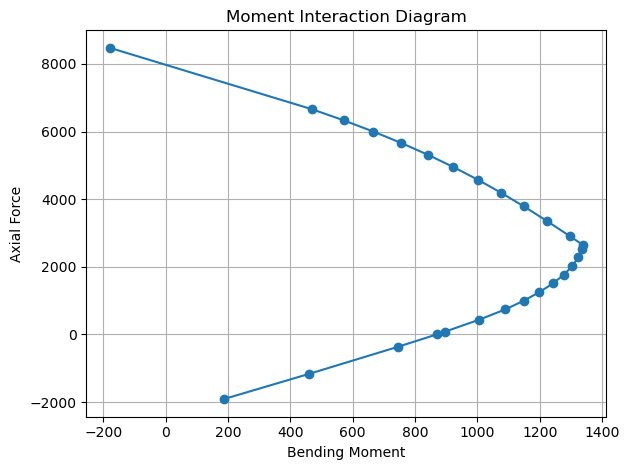

<Axes: title={'center': 'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [10]:
mi_res = conc_sec.moment_interaction_diagram(progress_bar=False)
mi_res.plot_diagram()